In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from math import ceil

%matplotlib inline

## 1. Load data

In [52]:
df = pd.read_csv('../train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## 2. Clean Data

### 2.1 Columns with NaN Values

In [54]:
cols_with_na = df.isnull().sum()
cols_with_na = cols_with_na[cols_with_na>0]
print(cols_with_na.sort_values(ascending=False))    

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


### 2.2 Meaningful NaN Values

In [83]:
df.Alley = df.Alley.fillna(value = 'NoAlley')
df.BsmtCond = df.BsmtCond.fillna(value = 'NoBsmt')
df.BsmtQual = df.BsmtQual.fillna(value = 'NoBsmt')
df.BsmtExposure = df.BsmtExposure.fillna(value= 'NoBsmt')
df.BsmtFinType1 = df.BsmtFinType1.fillna(value= 'NoBsmt')
df.BsmtFinType2 = df.BsmtFinType2.fillna(value= 'NoBsmt')
df.LotFrontage = df.LotFrontage.fillna(value = 0)
df.FireplaceQu = df.FireplaceQu.fillna(value = 'Nofireplace')
df.GarageType = df.GarageType.fillna(value = 'NoGarage')
df.GarageCond = df.GarageCond.fillna(value = 'NoGarage')
df.GarageFinish = df.GarageFinish.fillna(value = 'NoGarage')
df.GarageYrBlt = df.GarageYrBlt.fillna(value = 0)           
df.GarageQual = df.GarageQual.fillna(value = 'NoGarage')

df.PoolQC = df.PoolQC.fillna(value = 'NoPool')
df.Fence = df.Fence.fillna(value = 'NoFence')
df.MiscFeature = df.MiscFeature.fillna(value = 'NoMisc')
df.MasVnrType = df.MasVnrType.fillna(value = 'noMas')
df.MasVnrArea = df.MasVnrArea.fillna(value = 'noMas')

df.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-nul

### 2.3 Distribution of SalePrice

/Users/changyaohua/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


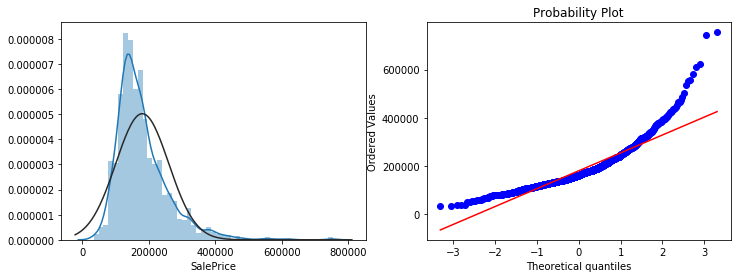

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
_ = sns.distplot(df.SalePrice.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(df.SalePrice.dropna(), plot=plt)

### 2.4 Log Transform SalePrice

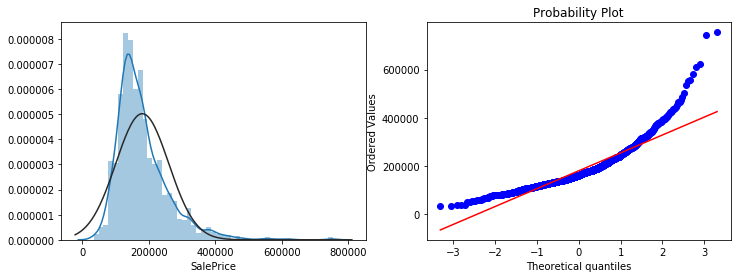

In [57]:
#Log Transform SalePrice to improve normality
sp = df.SalePrice
df.SalePrice = np.log(sp)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
_ = sns.distplot(sp.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(sp.dropna(), plot=plt)

## 3. Exploratory Data Analysis (EDA) 

Different types of features will need to be treated differently when digging deeper in to the data. Here I identify three types of features:

* Numeric-discrete: Numeric features with less than 13 unique values, such as month of the year, or the numeric scales created above.
* Numeric-continuous: Numeric features with 13 or more unique values, such as areas, the year a property was built etc.
* Categorical: The remaining non-numeric features.

In [58]:
# extract names of numeric columns
dtypes = df.dtypes
cols_numeric = dtypes[dtypes != object].index.tolist()

# MSubClass should be treated as categorical
cols_numeric.remove('MSSubClass')

# choose any numeric column with less than 13 values to be
# "discrete". 13 chosen to include months of the year.
# other columns "continuous"
col_nunique = dict()

for col in cols_numeric:
    col_nunique[col] = df[col].nunique()
    
col_nunique = pd.Series(col_nunique)

cols_discrete = col_nunique[col_nunique<13].index.tolist()
cols_continuous = col_nunique[col_nunique>=13].index.tolist()

print(len(cols_numeric),'numeric columns, of which',
      len(cols_continuous),'are continuous and',
      len(cols_discrete),'are discrete.')

35 numeric columns, of which 21 are continuous and 14 are discrete.


In [59]:
# extract names of categorical columns
cols_categ = dtypes[~dtypes.index.isin(cols_numeric)].index.tolist()

for col in cols_categ:
    df[col] = df[col].astype('category')
    
print(len(cols_categ),'categorical columns.')

45 categorical columns.


### 3.1 Distribution of SalePrice in Categorical Variables

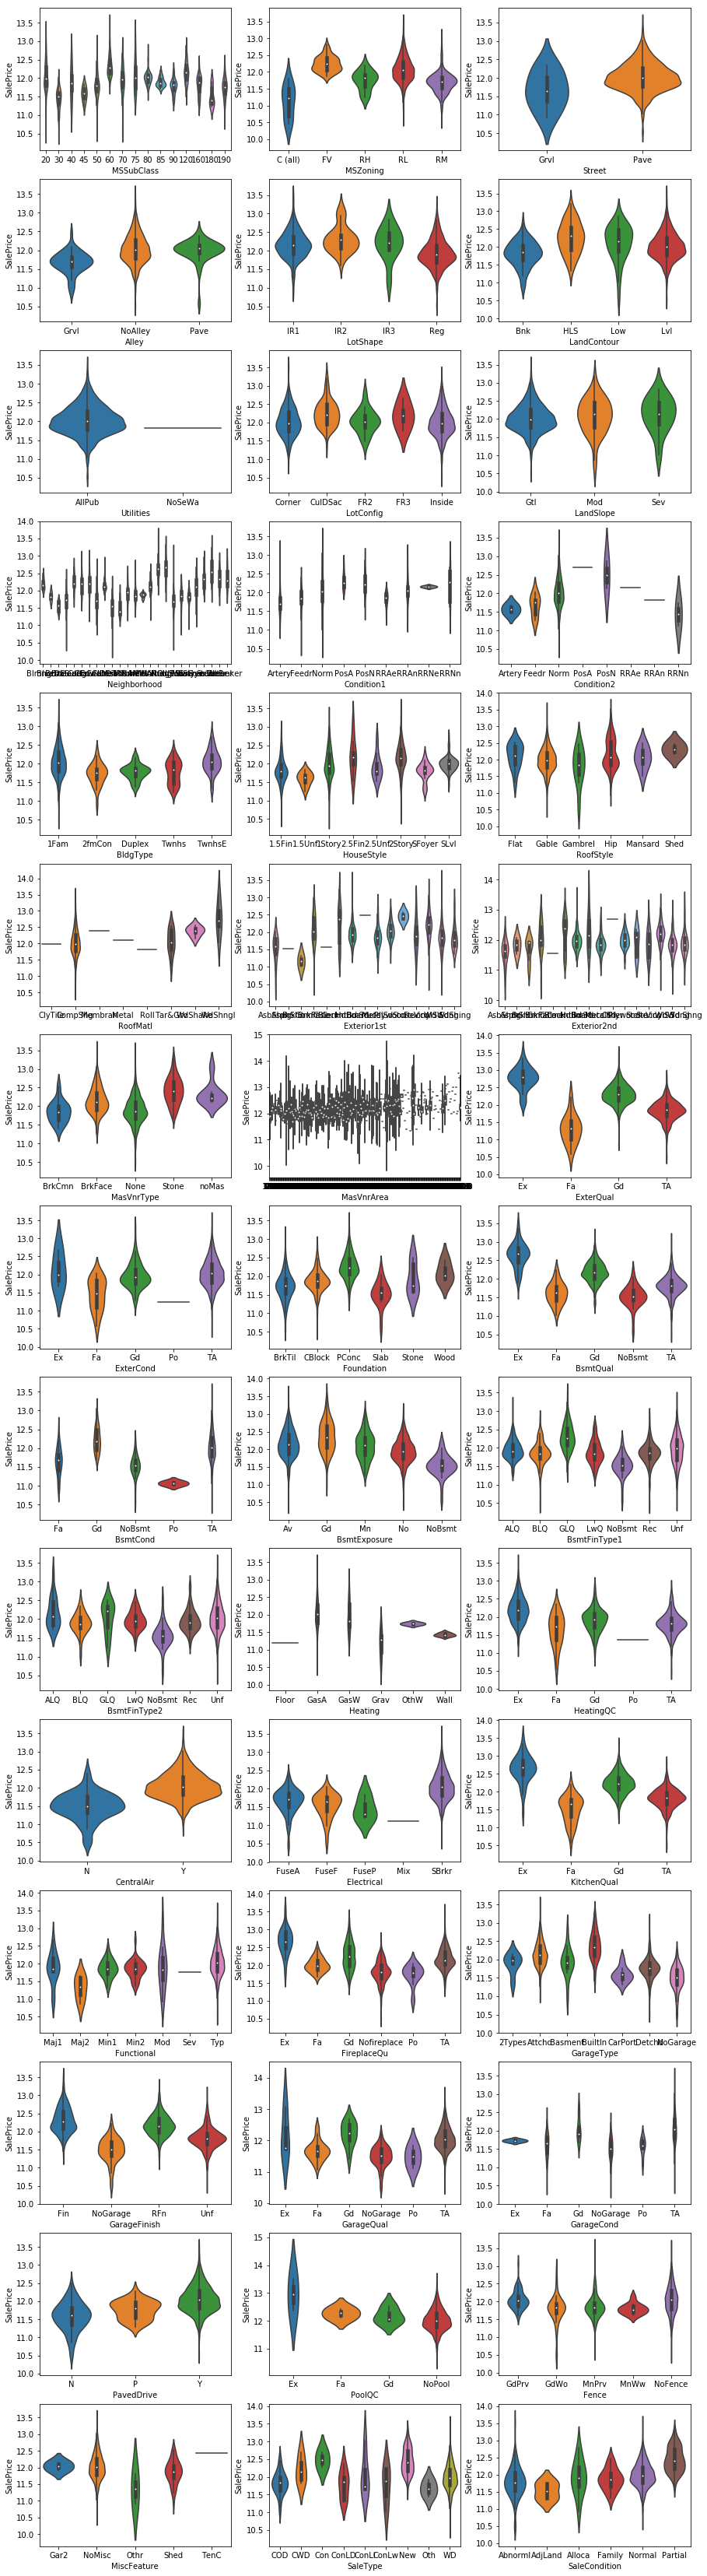

In [60]:
# plot categorical variables
fcols = 3
frows = ceil(len(cols_categ)/fcols)
plt.figure(figsize=(15,4*frows))

for i,col in enumerate(cols_categ):
    plt.subplot(frows,fcols,i+1)
    _ = sns.violinplot(df[col],df['SalePrice'])

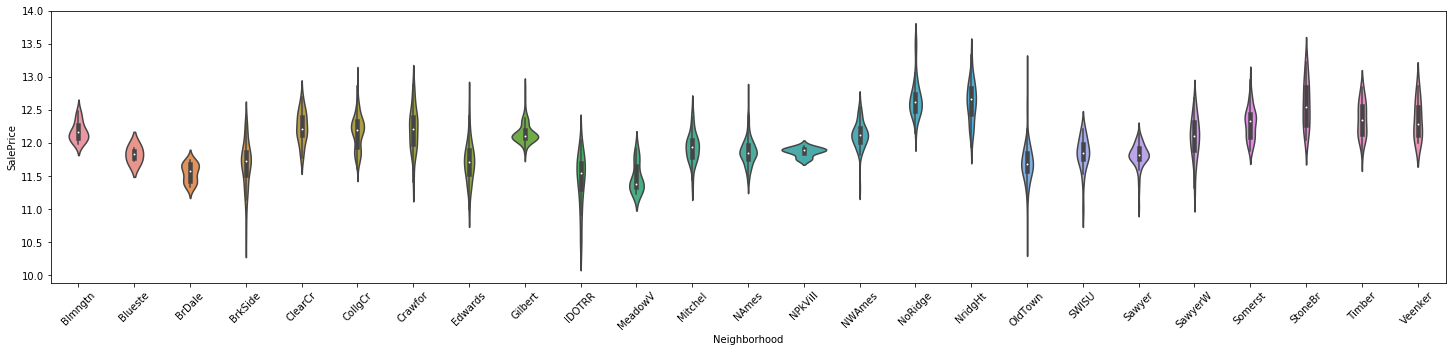

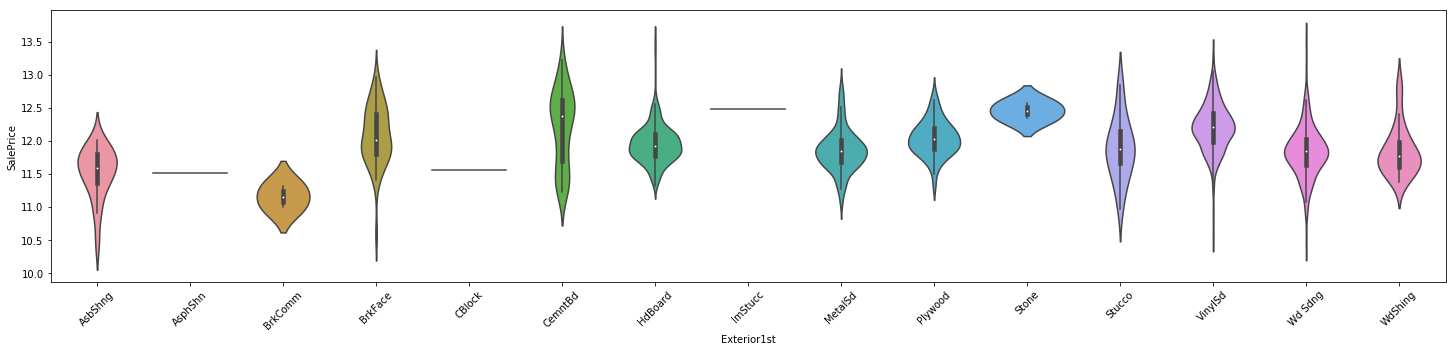

In [61]:
#Neighbourhood
plt.figure(figsize=(25,5))
sns.violinplot(x='Neighborhood',y='SalePrice',data=df)
plt.xticks(rotation=45);

#Exterior1st
plt.figure(figsize=(25,5))
sns.violinplot(x='Exterior1st',y='SalePrice',data=df)
plt.xticks(rotation=45);

In [62]:
df.BsmtCond = df.BsmtCond.map({'Ex':5 ,'Gd':4 , 'TA':3 ,'Fa':2 ,'Po':1 , 'NoBsmt':0})
df.BsmtQual = df.BsmtQual.map({'Ex':5 ,'Gd':4 , 'TA':3 ,'Fa':2 ,'Po':1 , 'NoBsmt':0})
df.BsmtExposure = df.BsmtExposure.map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NoBsmt':0})
df.BsmtFinType1 = df.BsmtFinType1.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBsmt':0})
df.BsmtFinType2 = df.BsmtFinType2.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBsmt':0})

df.GarageType = df.GarageType.map({'2Types':4 , 'Attchd': 5, 'Basment':3 ,'BuiltIn':6 ,
                                       'CarPort' :1, 'Detchd':2 , 'NoGarage': 0})

df.GarageCond = df.GarageCond.map({'NoGarage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NoGarage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageFinish = df.GarageFinish.map({'Fin':3, 'RFn':2, 'Unf':1, 'NoGarage':0})
df.PavedDrive = df.PavedDrive.map({'Y':2,'P':1, 'N':0 })

In [63]:
df.ExterCond = df.ExterCond.map({"Ex":4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df.ExterQual = df.ExterQual.map({"Ex":4,'Gd':3,'TA':2,'Fa':1,'Po':0})

df.CentralAir = df.CentralAir.map({'Y':1, 'N':0})
df.HeatingQC = df.HeatingQC.map({"Ex":4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df.FireplaceQu = df.FireplaceQu.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'Nofireplace':0})

df.KitchenQual = df.KitchenQual.map({"Ex":4,'Gd':3,'TA':2,'Fa':1,'Po':0})

df.PoolQC = df.PoolQC.map({"Ex":4,'Gd':3,'TA':2,'Fa':1,'NoPool':0})
df.Fence = df.Fence.map({'GdPrv':4 , 'MnPrv':3 , 'GdWo':2 , 'MnWw':1 , 'NoFence':0})

### 3.2 Distribution of SalePrice in Discrete Numeric Features

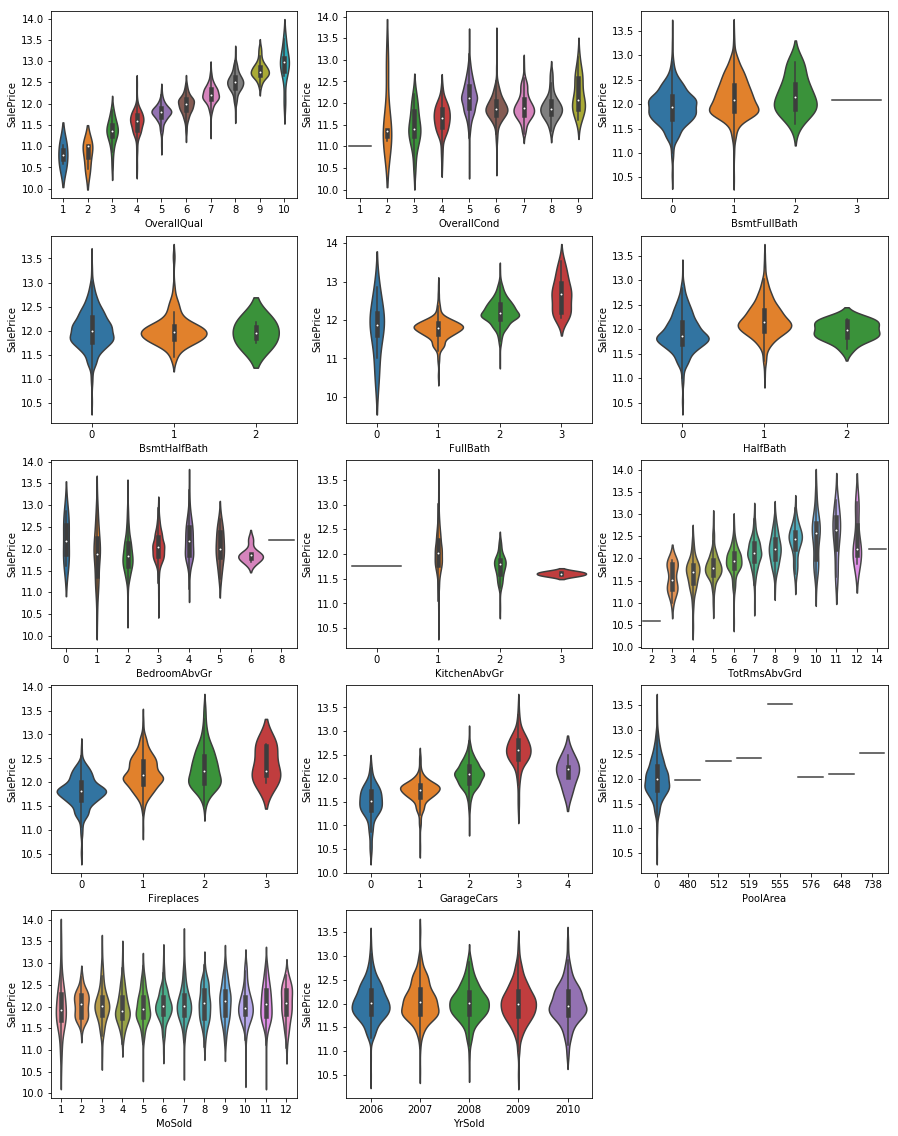

In [64]:
fcols = 3
frows = ceil(len(cols_discrete)/fcols)
plt.figure(figsize=(15,4*frows))

for i,col in enumerate(cols_discrete):
    plt.subplot(frows,fcols,i+1)
    sns.violinplot(df[col],df['SalePrice'])

### 3.3 Distribution of Continuous Variables and Effect on SalePrice

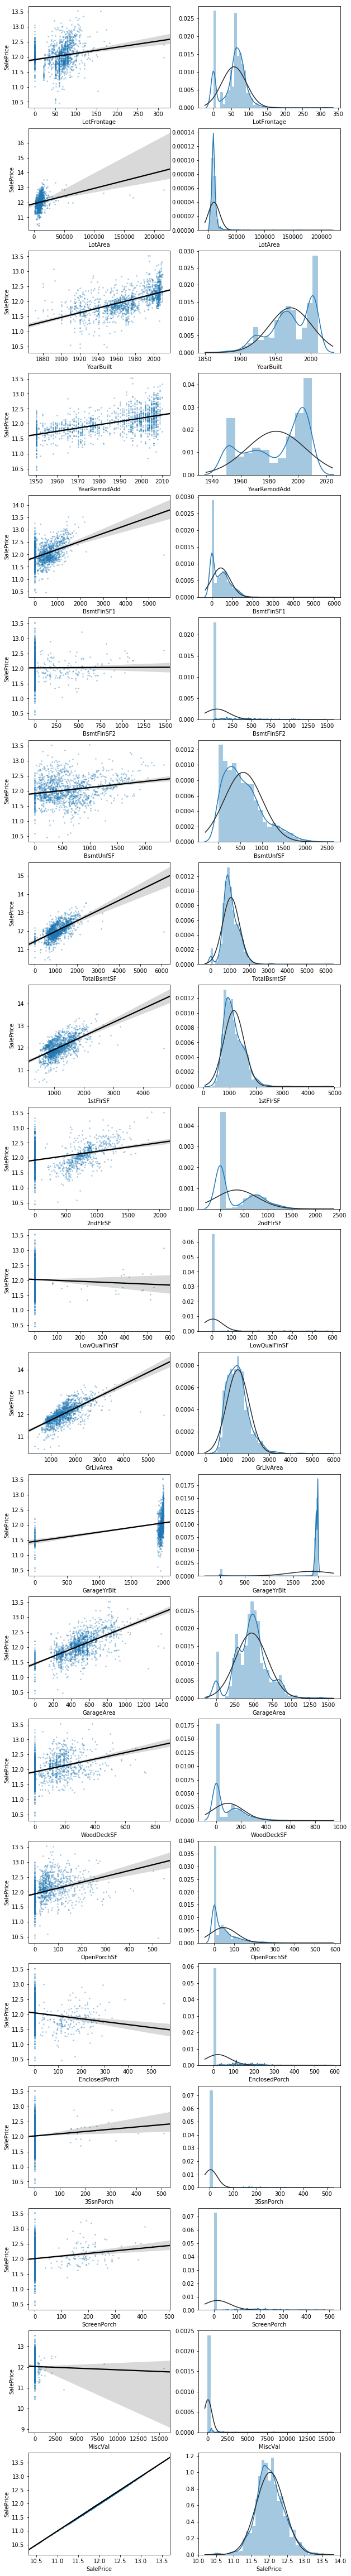

In [65]:
fcols = 2
frows = len(cols_continuous)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in cols_continuous:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='SalePrice', data=df, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(df[col].dropna() , fit=stats.norm)
    plt.xlabel(col)

### 3.4 Correlation Between Numeric Features

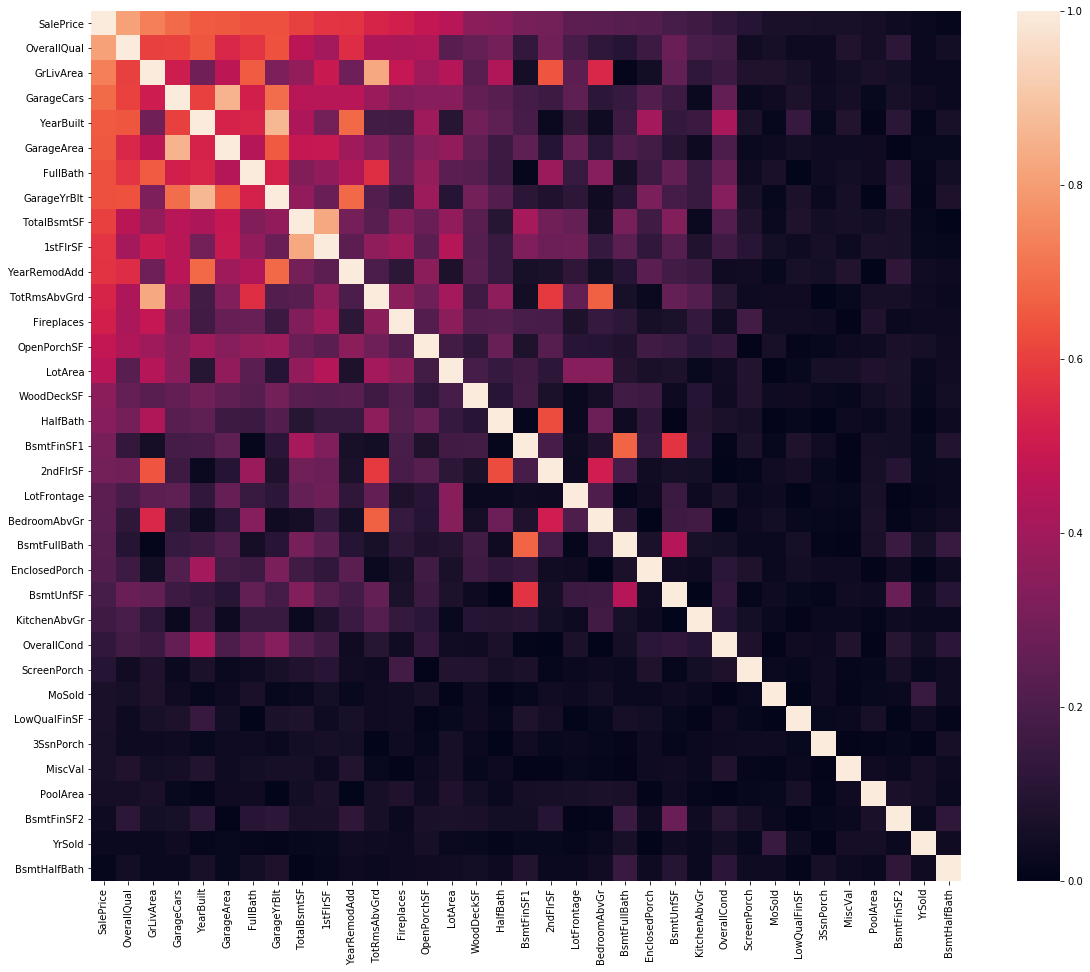

In [66]:
# correlation between numeric variables
df_corr = df[cols_numeric].corr(method='spearman').abs()

# order columns and rows by correlation with SalePrice
df_corr = df_corr.sort_values('SalePrice',axis=0,ascending=False).sort_values('SalePrice',axis=1,ascending=False)

ax=plt.figure(figsize=(20,16)).gca()
sns.heatmap(df_corr,ax=ax,square=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-nul

In [68]:
# cols = ['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']
cols = ['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']

/Users/changyaohua/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


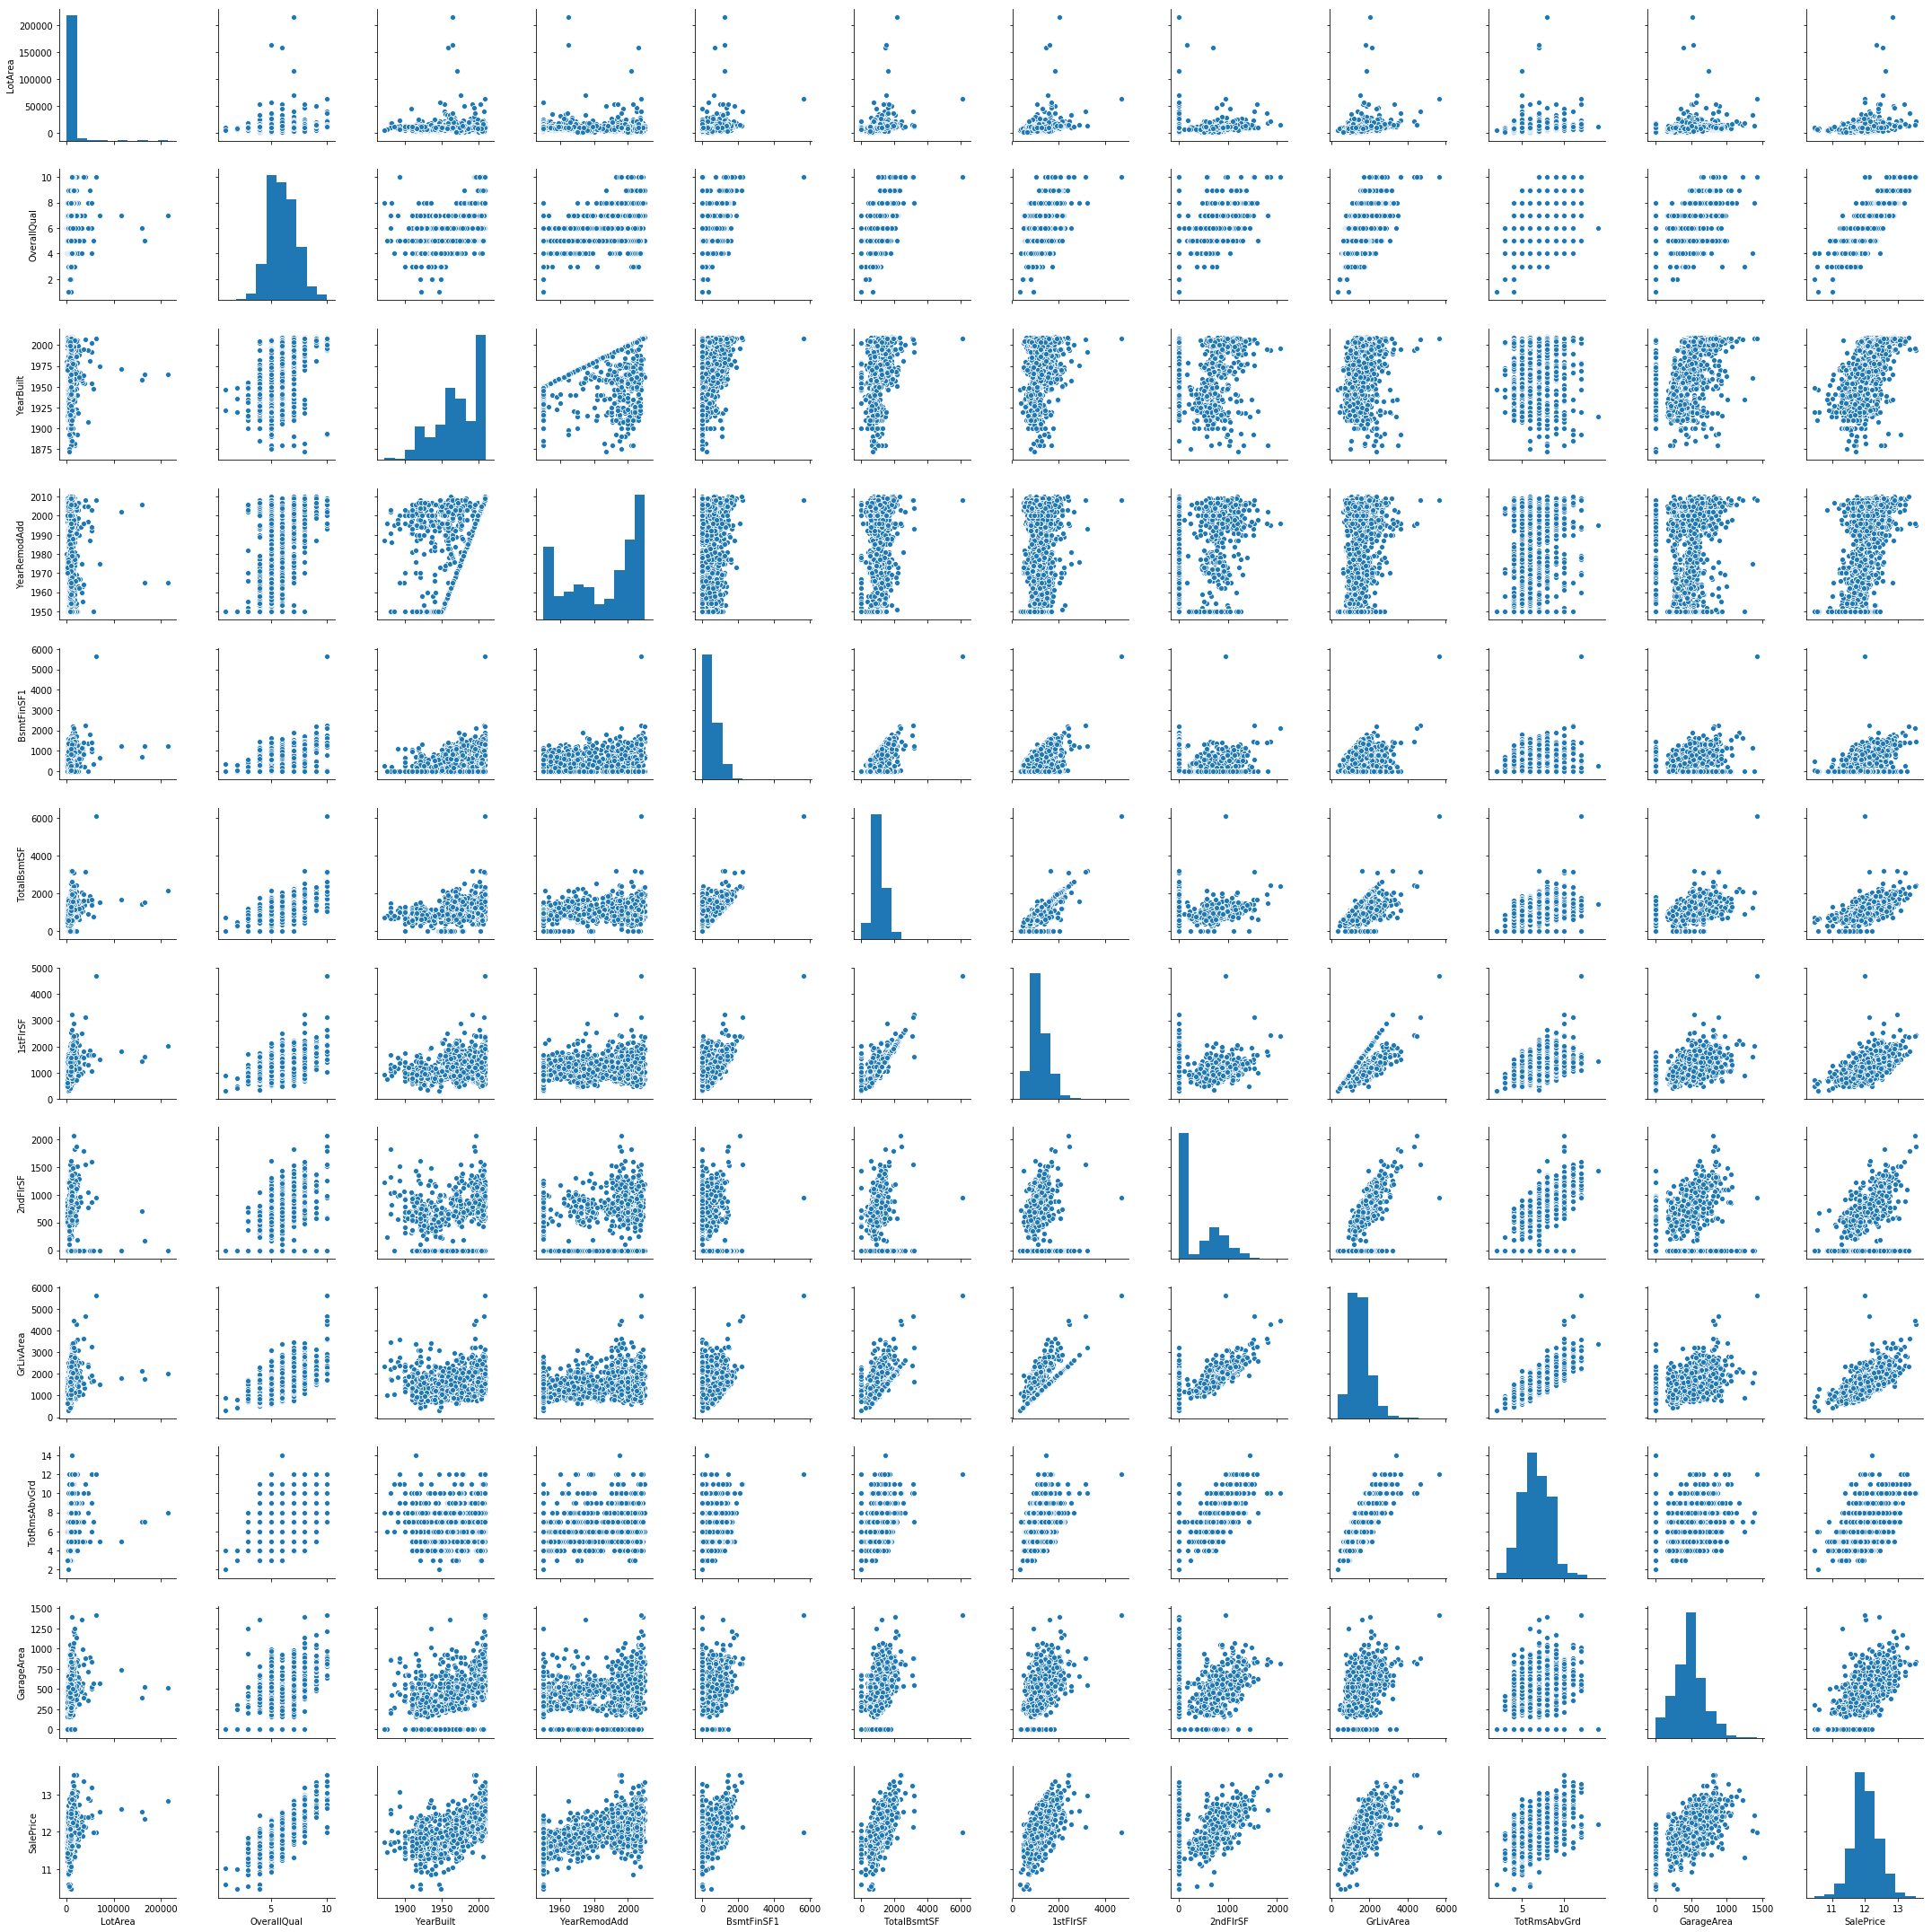

In [69]:
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

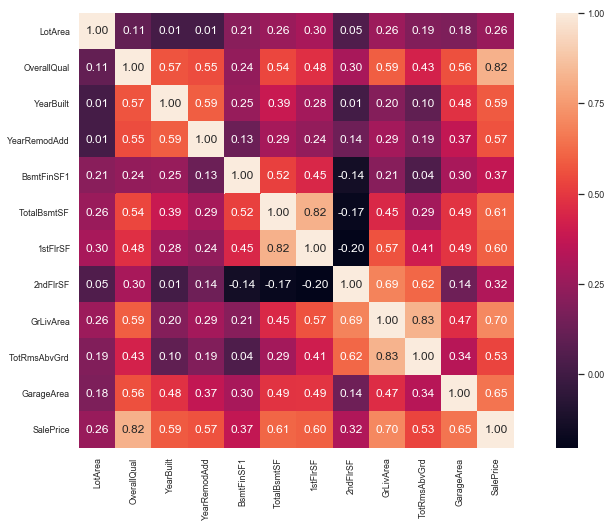

In [70]:
fig = plt.figure(figsize=(15,8))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols, xticklabels=cols)
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-nul

### 3.5 Identify and Remove Outliers

In [78]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge

In [75]:
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)


In [76]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

In [84]:
d_df = pd.get_dummies(df, drop_first= True)
d_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 546 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(50), uint8(493)
memory usage: 1.3 MB


R2= 0.947325794892571
rmse= 0.09164624386294766
---------------------------------------
mean of residuals: -7.884104328297002e-16
std of residuals: 0.09167764569489989
---------------------------------------
19 outliers:
[31, 89, 411, 463, 496, 524, 534, 633, 682, 689, 711, 875, 917, 969, 971, 1299, 1325, 1433, 1454]


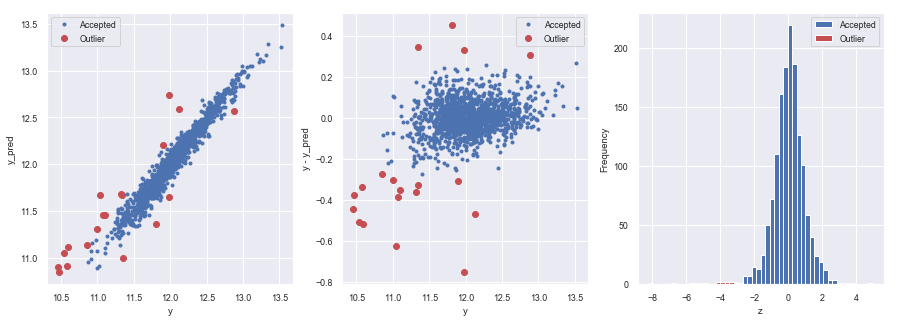

In [85]:
y = d_df.SalePrice
X = d_df.drop('SalePrice',axis=1)
    
# find and remove outliers using a Ridge model
outliers = find_outliers(Ridge(), X, y)

# permanently remove these outliers from the data
df_model = df.drop(outliers)

In [86]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 546 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(50), uint8(493)
memory usage: 1.3 MB


In [87]:
d_df.to_csv('./clean_data.csv')